<a href="https://colab.research.google.com/github/ehadsaloF/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import warnings
warnings.filterwarnings("ignore")


In [ ]:
#importing data
df = pd.read_excel("/content/Unit6-Portfolio-Task-Data.xlsx", header=1)

In [ ]:
# df.columns=df.iloc[0]
df.head()

,Current Account,Savings Account,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Job,Credit Risk
0,0,739,13,12,M,Single,23,Own,Unskilled,Low
1,0,1230,25,0,M,Divorced,32,Own,Skilled,High
2,0,389,19,119,M,Single,38,Own,Management,High
3,638,347,13,14,M,Single,36,Own,Unskilled,High
4,963,4754,40,45,M,Single,31,Rent,Skilled,Low


##Data Cleaning

In [ ]:
# check for datatype of features
df.dtypes

Current Account     int64
Savings Account     int64
Months Customer     int64
Months Employed     int64
Gender             object
Marital Status     object
Age                 int64
Housing            object
Job                object
Credit Risk        object
dtype: object

In [ ]:
#check for null vaues
df.isnull().sum()

Current Account    0
Savings Account    0
Months Customer    0
Months Employed    0
Gender             0
Marital Status     0
Age                0
Housing            0
Job                0
Credit Risk        0
dtype: int64

In [ ]:
#Checking for wrongly spelt values
for i in ['Gender', 'Marital Status', 'Housing', 'Job', 'Credit Risk']:
  print(df[i].value_counts())
  print('\n')

M    290
F    135
Name: Gender, dtype: int64


Single      233
Divorced    156
Married      36
Name: Marital Status, dtype: int64


Own      292
Rent      81
Other     52
Name: Housing, dtype: int64


Skilled       271
Unskilled      89
Management     54
Unemployed     11
Name: Job, dtype: int64


Low     214
High    211
Name: Credit Risk, dtype: int64




## Descriptive Statistics

In [ ]:
#descriptive statistics
df.describe(include='all')

,Current Account,Savings Account,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Job,Credit Risk
count,425.000000,425.000000,425.000000,425.000000,425,425,425.000000,425,425,425
unique,NaN,NaN,NaN,NaN,2,3,NaN,3,4,2
top,NaN,NaN,NaN,NaN,M,Single,NaN,Own,Skilled,Low
freq,NaN,NaN,NaN,NaN,290,233,NaN,292,271,214
mean,1048.014118,1812.562353,22.896471,31.896471,NaN,NaN,34.397647,NaN,NaN,NaN
std,3147.183472,3597.285020,12.267599,32.259321,NaN,NaN,11.045126,NaN,NaN,NaN
min,0.000000,0.000000,5.000000,0.000000,NaN,NaN,18.000000,NaN,NaN,NaN
25%,0.000000,228.000000,13.000000,6.000000,NaN,NaN,26.000000,NaN,NaN,NaN
50%,0.000000,596.000000,19.000000,20.000000,NaN,NaN,32.000000,NaN,NaN,NaN
75%,560.000000,921.000000,28.000000,47.000000,NaN,NaN,41.000000,NaN,NaN,NaN


The value of the median of the current account balance and savings account balance is very far from the mean. This means they are skewed.

## Data Visualization

###  Current Account


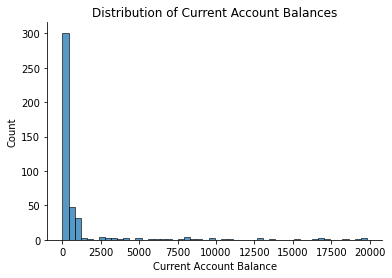

In [ ]:
# Create a histogram of current account balances
sns.histplot(data=df, x='Current Account', bins=50)
plt.title('Distribution of Current Account Balances')
plt.xlabel('Current Account Balance')
plt.ylabel('Count')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

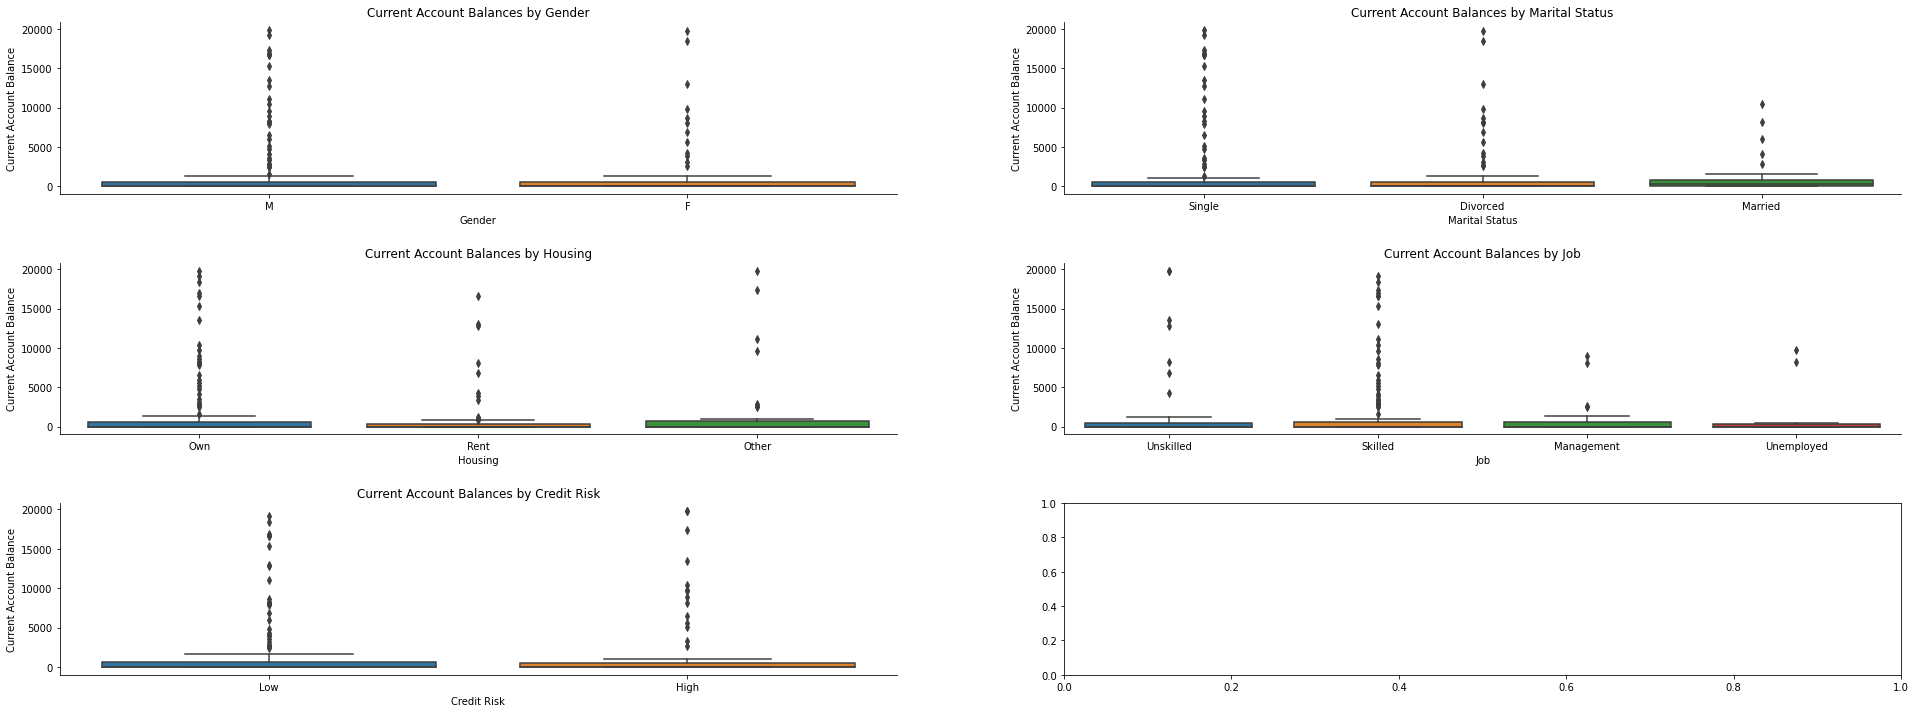

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(33, 12))

# Create a box plot of current account balances by gender
sns.boxplot(data=df, x='Gender', y='Current Account', ax=axes[0,0])
axes[0,0].set_title('Current Account Balances by Gender')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Current Account Balance')

axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Create a box plot of current account balances by Marital Status
sns.boxplot(data=df, x='Marital Status', y='Current Account', ax=axes[0,1])
axes[0,1].set_title('Current Account Balances by Marital Status')
axes[0,1].set_xlabel('Marital Status')
axes[0,1].set_ylabel('Current Account Balance')

axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)

# Create a box plot of current account balances by Housing
sns.boxplot(data=df, x='Housing', y='Current Account', ax=axes[1,0])
axes[1,0].set_title('Current Account Balances by Housing')
axes[1,0].set_xlabel('Housing')
axes[1,0].set_ylabel('Current Account Balance')

axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)

# Create a box plot of current account balances by Job
sns.boxplot(data=df, x='Job', y='Current Account', ax=axes[1,1])
axes[1,1].set_title('Current Account Balances by Job')
axes[1,1].set_xlabel('Job')
axes[1,1].set_ylabel('Current Account Balance')

axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)

# Create a box plot of current account balances by Credit Risk
sns.boxplot(data=df, x='Credit Risk', y='Current Account', ax=axes[2,0])
axes[2,0].set_title('Current Account Balances by Credit Risk')
axes[2,0].set_xlabel('Credit Risk')
axes[2,0].set_ylabel('Current Account Balance')

axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)


# Adjust the layout
plt.subplots_adjust(hspace=0.4)


plt.show()


###  Savings Account


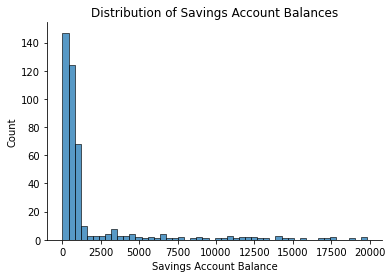

In [ ]:
# Create a histogram of savings account balances
sns.histplot(data=df, x='Savings Account', bins=50)
plt.title('Distribution of Savings Account Balances')
plt.xlabel('Savings Account Balance')
plt.ylabel('Count')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

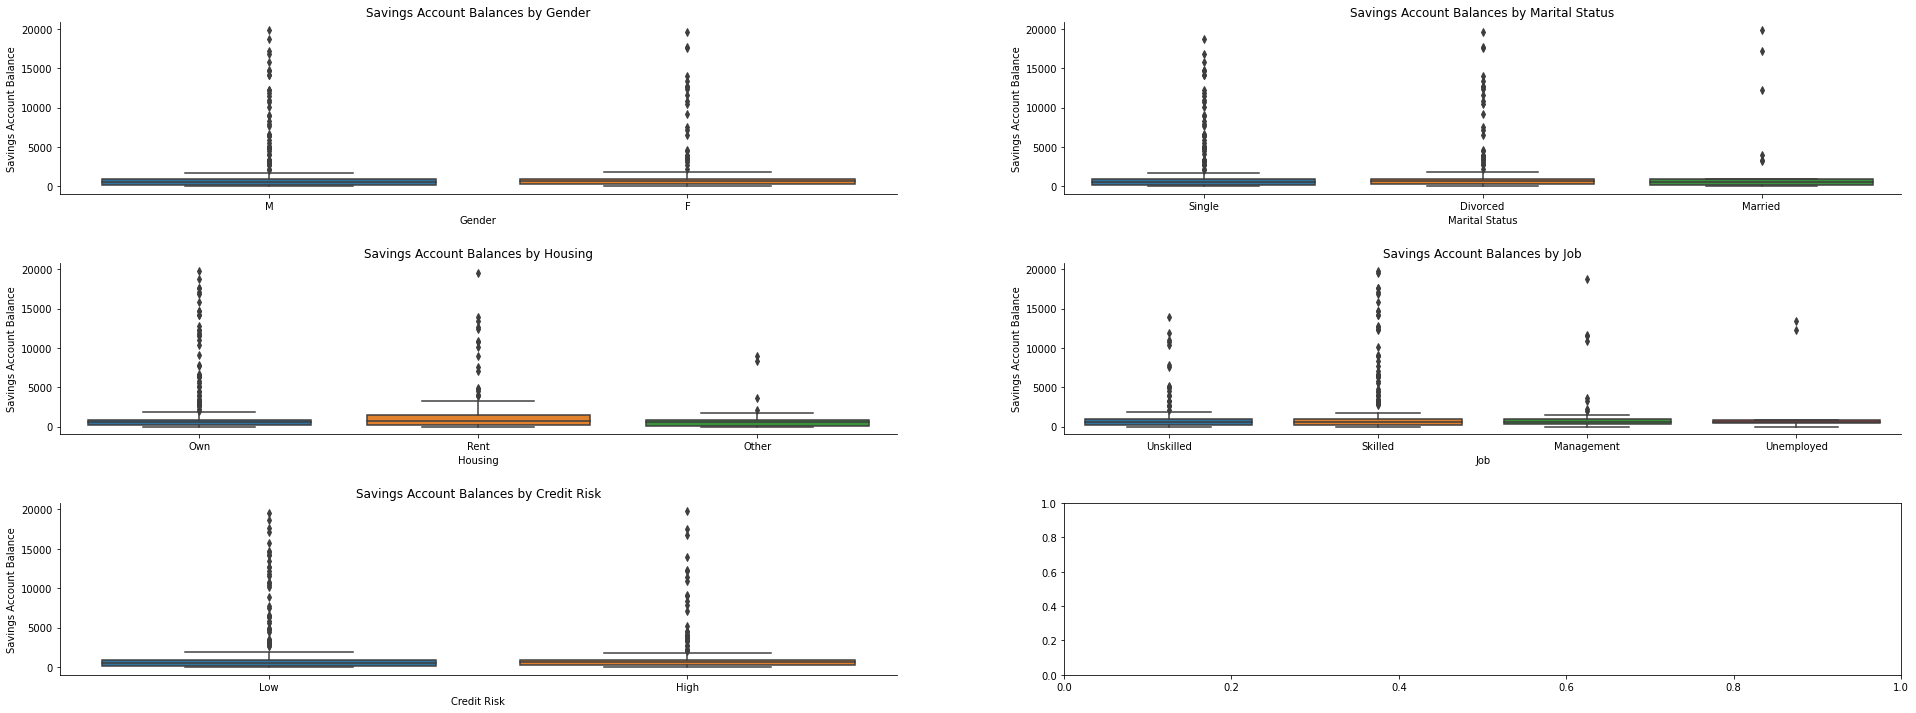

In [ ]:

fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(33, 12))

# Create a box plot of Savings account balances by gender
sns.boxplot(data=df, x='Gender', y='Savings Account', ax=axes[0,0])
axes[0,0].set_title('Savings Account Balances by Gender')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Savings Account Balance')

axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Create a box plot of Savings account balances by Marital Status
sns.boxplot(data=df, x='Marital Status', y='Savings Account', ax=axes[0,1])
axes[0,1].set_title('Savings Account Balances by Marital Status')
axes[0,1].set_xlabel('Marital Status')
axes[0,1].set_ylabel('Savings Account Balance')

axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)

# Create a box plot of Savings account balances by Housing
sns.boxplot(data=df, x='Housing', y='Savings Account', ax=axes[1,0])
axes[1,0].set_title('Savings Account Balances by Housing')
axes[1,0].set_xlabel('Housing')
axes[1,0].set_ylabel('Savings Account Balance')

axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)

# Create a box plot of Savings account balances by Job
sns.boxplot(data=df, x='Job', y='Savings Account', ax=axes[1,1])
axes[1,1].set_title('Savings Account Balances by Job')
axes[1,1].set_xlabel('Job')
axes[1,1].set_ylabel('Savings Account Balance')

axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)

# Create a box plot of Savings account balances by Credit Risk
sns.boxplot(data=df, x='Credit Risk', y='Savings Account', ax=axes[2,0])
axes[2,0].set_title('Savings Account Balances by Credit Risk')
axes[2,0].set_xlabel('Credit Risk')
axes[2,0].set_ylabel('Savings Account Balance')

axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)


# Adjust the layout
plt.subplots_adjust(hspace=0.4)


plt.show()

###  Months Customer


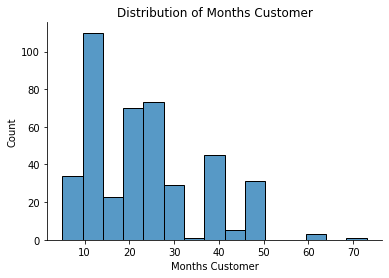

In [ ]:
# Create a histogram of Months Customer balances
sns.histplot(data=df, x='Months Customer', bins=15)
plt.title('Distribution of Months Customer')
plt.xlabel('Months Customer')
plt.ylabel('Count')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

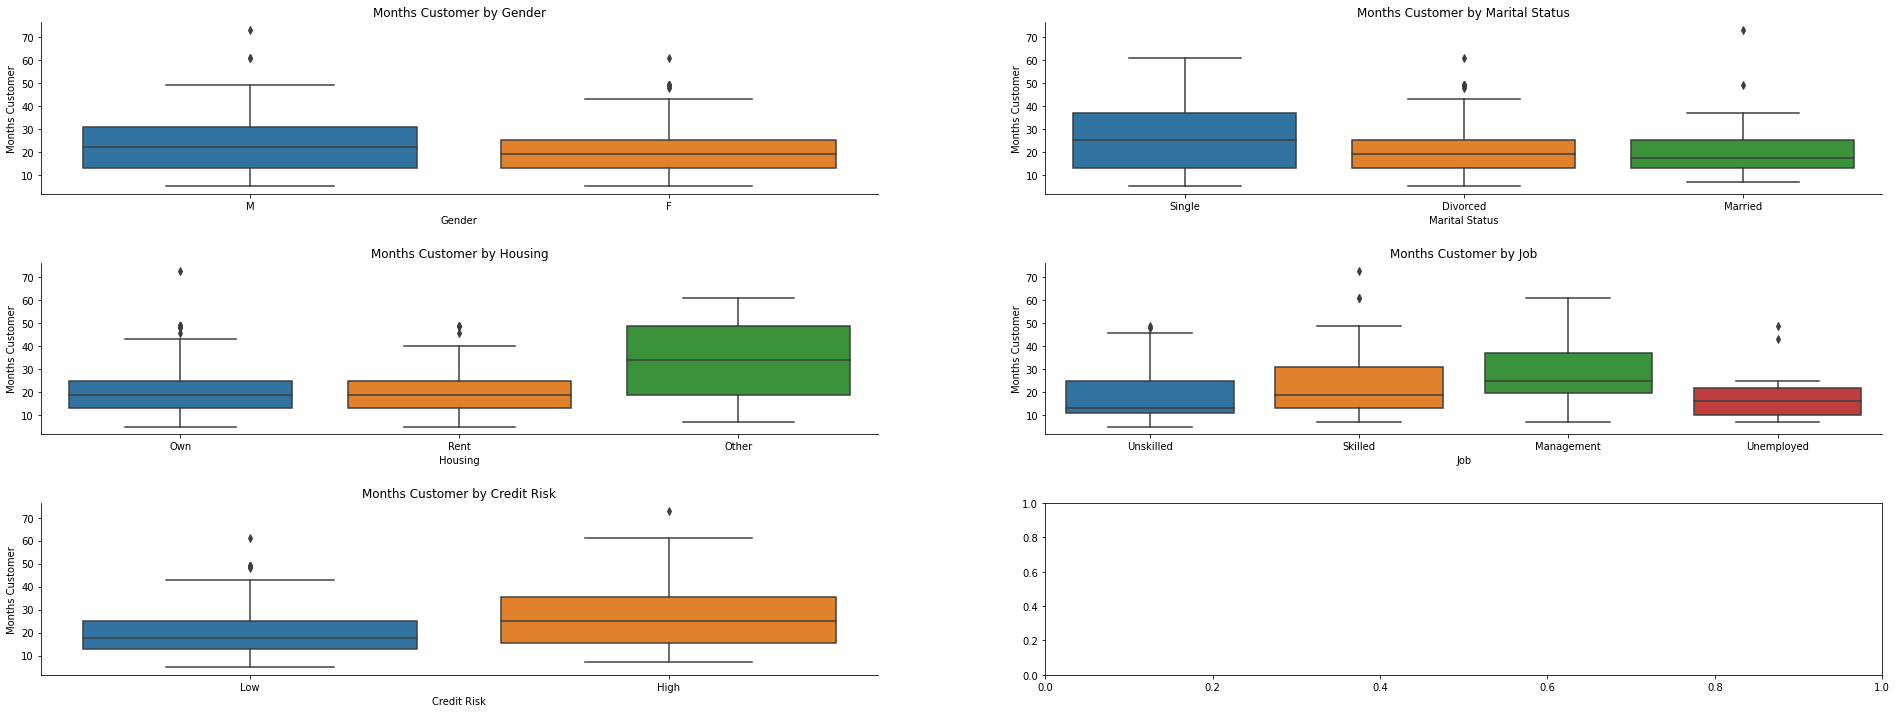

In [ ]:

fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(33, 12))

# Create a box plot of Months Customer by gender
sns.boxplot(data=df, x='Gender', y='Months Customer', ax=axes[0,0])
axes[0,0].set_title('Months Customer by Gender')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Months Customer')

axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Create a box plot of Months Customer by Marital Status
sns.boxplot(data=df, x='Marital Status', y='Months Customer', ax=axes[0,1])
axes[0,1].set_title('Months Customer by Marital Status')
axes[0,1].set_xlabel('Marital Status')
axes[0,1].set_ylabel('Months Customer')

axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)

# Create a box plot of Months Customer by Housing
sns.boxplot(data=df, x='Housing', y='Months Customer', ax=axes[1,0])
axes[1,0].set_title('Months Customer by Housing')
axes[1,0].set_xlabel('Housing')
axes[1,0].set_ylabel('Months Customer')

axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)

# Create a box plot of Savings account balances by Job
sns.boxplot(data=df, x='Job', y='Months Customer', ax=axes[1,1])
axes[1,1].set_title('Months Customer by Job')
axes[1,1].set_xlabel('Job')
axes[1,1].set_ylabel('Months Customer')

axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)

# Create a box plot of Months Customer by Credit Risk
sns.boxplot(data=df, x='Credit Risk', y='Months Customer', ax=axes[2,0])
axes[2,0].set_title('Months Customer by Credit Risk')
axes[2,0].set_xlabel('Credit Risk')
axes[2,0].set_ylabel('Months Customer')

axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)


# Adjust the layout
plt.subplots_adjust(hspace=0.4)


plt.show()

###  Months Employed


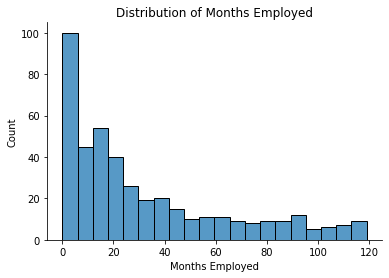

In [ ]:
# Create a histogram of Months Employed balances
sns.histplot(data=df, x='Months Employed', bins=20)
plt.title('Distribution of Months Employed')
plt.xlabel('Months Employed')
plt.ylabel('Count')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

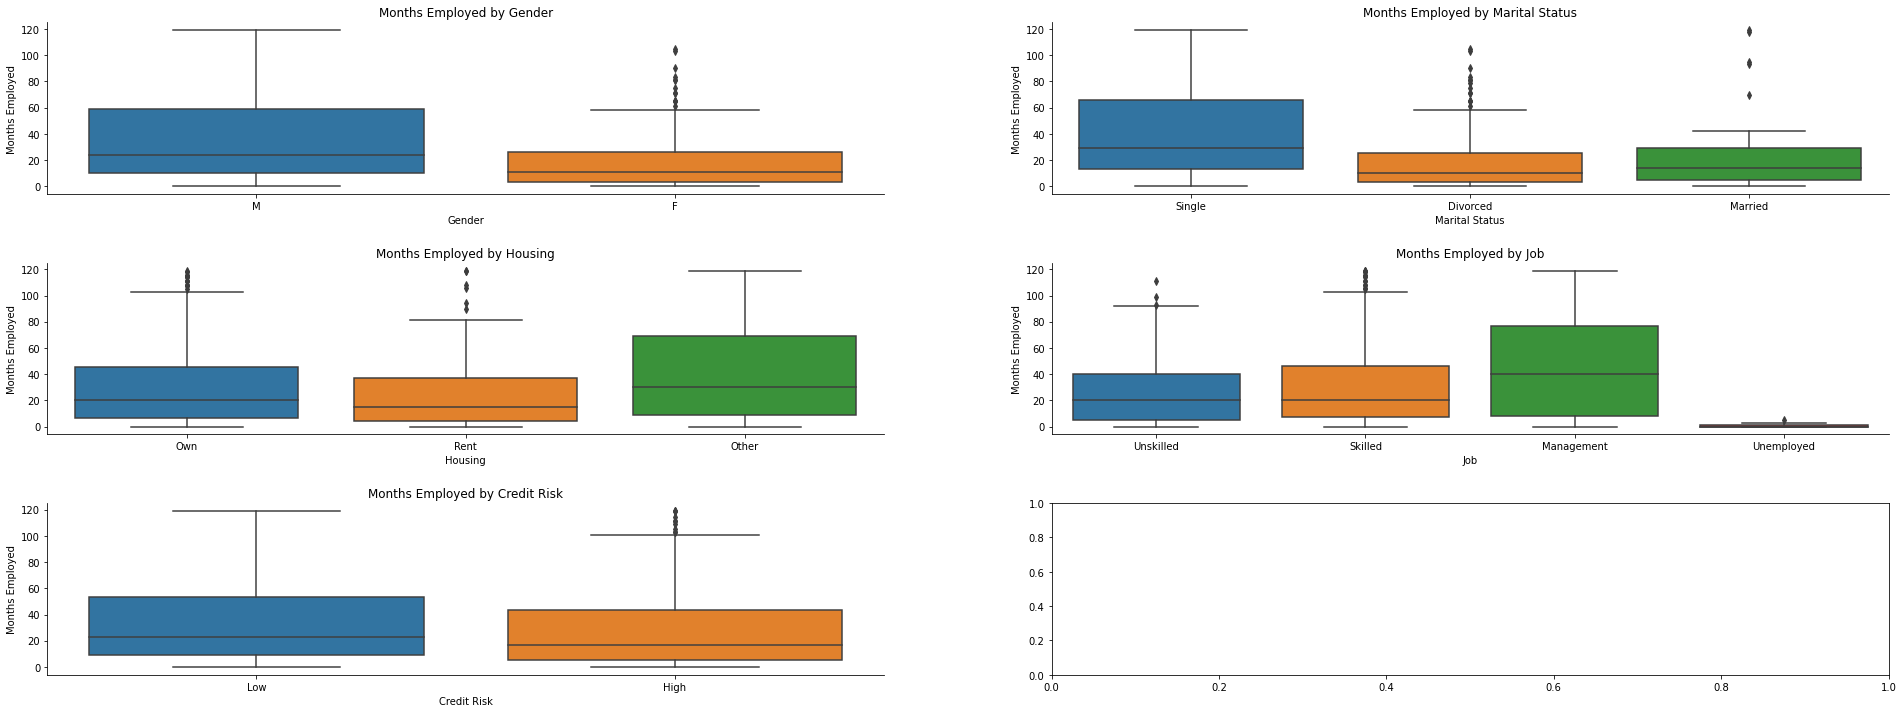

In [ ]:

fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(33, 12))

# Create a box plot of Months Employed by gender
sns.boxplot(data=df, x='Gender', y='Months Employed', ax=axes[0,0])
axes[0,0].set_title('Months Employed by Gender')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Months Employed')

axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Create a box plot of Months Employed by Marital Status
sns.boxplot(data=df, x='Marital Status', y='Months Employed', ax=axes[0,1])
axes[0,1].set_title('Months Employed by Marital Status')
axes[0,1].set_xlabel('Marital Status')
axes[0,1].set_ylabel('Months Employed')

axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)

# Create a box plot of Months Employed by Housing
sns.boxplot(data=df, x='Housing', y='Months Employed', ax=axes[1,0])
axes[1,0].set_title('Months Employed by Housing')
axes[1,0].set_xlabel('Housing')
axes[1,0].set_ylabel('Months Employed')

axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)

# Create a box plot of Savings account balances by Job
sns.boxplot(data=df, x='Job', y='Months Employed', ax=axes[1,1])
axes[1,1].set_title('Months Employed by Job')
axes[1,1].set_xlabel('Job')
axes[1,1].set_ylabel('Months Employed')

axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)

# Create a box plot of Months Employed by Credit Risk
sns.boxplot(data=df, x='Credit Risk', y='Months Employed', ax=axes[2,0])
axes[2,0].set_title('Months Employed by Credit Risk')
axes[2,0].set_xlabel('Credit Risk')
axes[2,0].set_ylabel('Months Employed')

axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)


# Adjust the layout
plt.subplots_adjust(hspace=0.4)


plt.show()

###  Gender


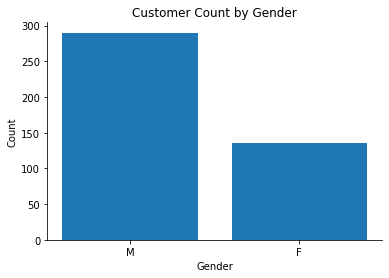

In [ ]:
# Count the number of customers by gender
gender_counts = df['Gender'].value_counts()

# Create a bar chart
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Customer Count by Gender')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show() 

###  Marital Status


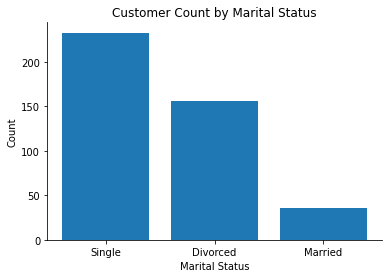

In [ ]:
# Count the number of customers by gender
Marital_counts = df['Marital Status'].value_counts()

# Create a bar chart
plt.bar(Marital_counts.index, Marital_counts.values)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Customer Count by Marital Status')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show() 

###  Age


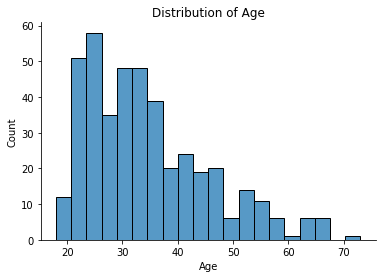

In [ ]:
# Create a histogram of Age
sns.histplot(data=df, x='Age', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

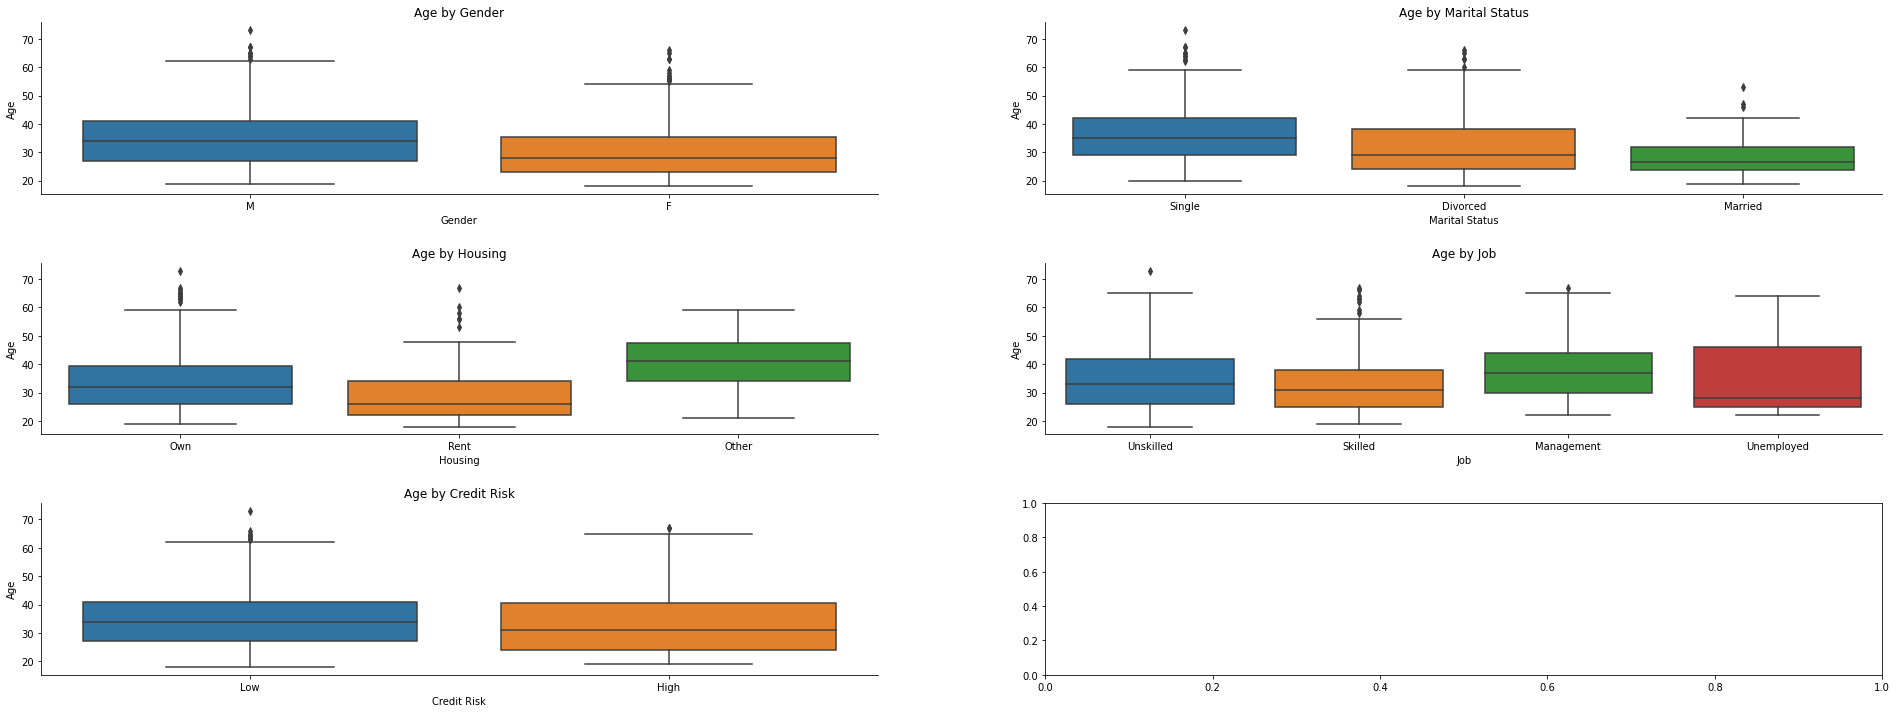

In [ ]:

fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(33, 12))

# Create a box plot of Age by gender
sns.boxplot(data=df, x='Gender', y='Age', ax=axes[0,0])
axes[0,0].set_title('Age by Gender')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Age')

axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Create a box plot of Age by Marital Status
sns.boxplot(data=df, x='Marital Status', y='Age', ax=axes[0,1])
axes[0,1].set_title('Age by Marital Status')
axes[0,1].set_xlabel('Marital Status')
axes[0,1].set_ylabel('Age')

axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)

# Create a box plot ofAgeby Housing
sns.boxplot(data=df, x='Housing', y='Age', ax=axes[1,0])
axes[1,0].set_title('Age by Housing')
axes[1,0].set_xlabel('Housing')
axes[1,0].set_ylabel('Age')

axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)

# Create a box plot of Age by Job
sns.boxplot(data=df, x='Job', y='Age', ax=axes[1,1])
axes[1,1].set_title('Age by Job')
axes[1,1].set_xlabel('Job')
axes[1,1].set_ylabel('Age')

axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)

# Create a box plot ofAge by Credit Risk
sns.boxplot(data=df, x='Credit Risk', y='Age', ax=axes[2,0])
axes[2,0].set_title('Age by Credit Risk')
axes[2,0].set_xlabel('Credit Risk')
axes[2,0].set_ylabel('Age')

axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)


# Adjust the layout
plt.subplots_adjust(hspace=0.4)


plt.show()

###  Housing


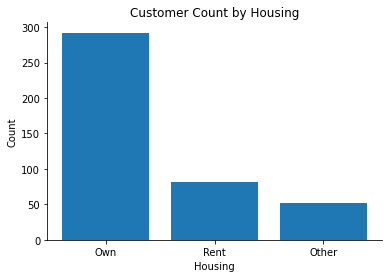

In [ ]:
# Count the number of customers by Housing
Housing_counts = df['Housing'].value_counts()

# Create a bar chart
plt.bar(Housing_counts.index, Housing_counts.values)
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Customer Count by Housing')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show() 

###  Job


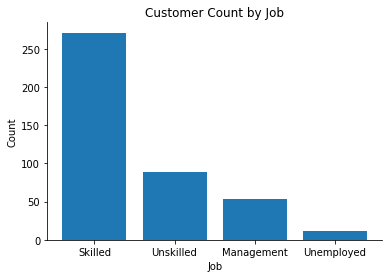

In [ ]:
# Count the number of customers by Job
Job_counts = df['Job'].value_counts()

# Create a bar chart
plt.bar(Job_counts.index, Job_counts.values)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Customer Count by Job')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show() 

###  Credit Risk


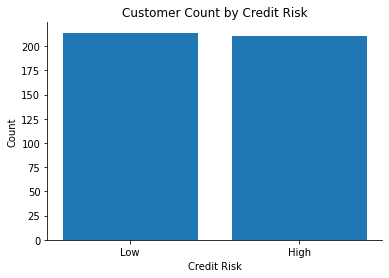

In [ ]:
# Count the number of customers by Credit Risk
Risk_counts = df['Credit Risk'].value_counts()

# Create a bar chart
plt.bar( Risk_counts.index, Risk_counts.values)
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.title('Customer Count by Credit Risk')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show() 

The visualizations show that the current account balance and savings account balance are heavily right skewed, they will need to be transformed before clustering the customers.

## Clustering

Hierarchical clustering was used to segment the customer data. 
<p> 
Agglomerative clustering method was used, where every object starts in its own cluster and via an iterative process, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named the <b>Dendrogram</b>. 
</p> 

<p>
In the dendrogram, the longest horizontal lines represent the largest differences. The desired number of clusters can be obtained by cutting the dendrogram at the proper level. 
</p> 

<p>
Hierarchical clustering analysis was carried out, the variables used are the continuous variables in the customer’s data, which are the customer’s age, savings and current account balance, how long they have been customers with the bank and how long they have been in employment. In this report, we use the Euclidean distance as the distance measure.
</p> 

In this report we compare two agglomerative hierarchical clustering methods, <b>Complete-link Clustering</b> and <b>Wards Clustering</b>. 

### Complete Link Clustering 

It is also known as furthest neighbour; this model considers the furthest distance between pairs of objects. <p>An object joins a cluster only if is like all cluster members.

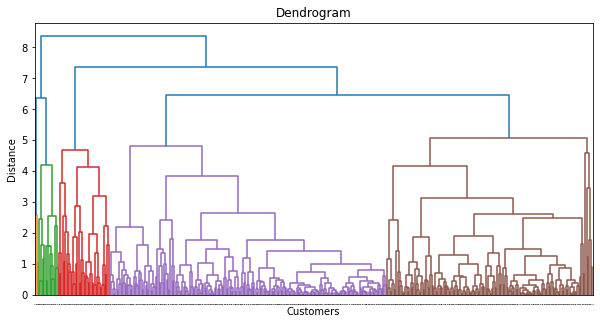

In [182]:
# define the variables to be used in clustering
X = df[['Current Account', 'Savings Account', 'Months Customer', 'Months Employed']]

# perform complete-linkage clustering
Z = linkage(X_scaled, method='complete', metric='euclidean')


# Plot a dendrogram to help choose the number of clusters
plt.figure(figsize=(10, 5))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=180, leaf_font_size=2.)
plt.show()

In [185]:

# Cut the dendrogram to obtain the desired number of clusters
threshold = 6.5
clusters = fcluster(Z, t=threshold, criterion='distance')

# n_clusters = 5
# clusters = pd.Series(
#     pd.cut(
#         np.arange(X.shape[0]), 
#         n_clusters, 
#         labels=False
#     )
# )

# # Add the cluster labels to the original DataFrame
df['cluster'] = clusters
print('There are ' + str(len(df['cluster'].value_counts())) + ' clusters')

There are 3 clusters


In [186]:
#cluster 1
print('\nDescriptive statistics for Cluster 1\n')
df[df['cluster']== 1].describe(include='all').transpose().reset_index().rename(columns={'index': 'Column'})


Descriptive statistics for Cluster 1



,Column,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,Current Account,18.0,NaN,NaN,NaN,14041.555556,4279.141492,8060.0,9820.0,14412.0,17258.25,19812.0
1,Savings Account,18.0,NaN,NaN,NaN,3429.166667,6612.896075,0.0,27.5,260.0,1829.5,19811.0
2,Months Customer,18.0,NaN,NaN,NaN,19.444444,8.354092,7.0,13.0,17.5,25.0,37.0
3,Months Employed,18.0,NaN,NaN,NaN,39.222222,26.591807,5.0,20.25,35.5,58.5,90.0
4,Gender,18,2,M,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Marital Status,18,3,Single,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Age,18.0,NaN,NaN,NaN,36.0,11.697159,22.0,26.25,34.0,40.25,65.0
7,Housing,18,3,Own,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Job,18,4,Skilled,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Credit Risk,18,2,Low,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
#cluster 2
print('\nDescriptive statistics for Cluster 2\n')
df[df['cluster']== 2].describe(include='all').transpose().reset_index().rename(columns={'index': 'Column'})


Descriptive statistics for Cluster 2



,Column,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,Current Account,39.0,NaN,NaN,NaN,111.897436,244.429389,0.0,0.0,0.0,0.0,959.0
1,Savings Account,39.0,NaN,NaN,NaN,10992.076923,4001.277575,4449.0,7617.5,10980.0,14078.0,18716.0
2,Months Customer,39.0,NaN,NaN,NaN,20.923077,8.980636,7.0,13.0,22.0,25.0,49.0
3,Months Employed,39.0,NaN,NaN,NaN,40.641026,37.350747,0.0,12.0,24.0,75.5,115.0
4,Gender,39,2,M,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Marital Status,39,3,Single,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Age,39.0,NaN,NaN,NaN,33.410256,12.05845,18.0,26.0,30.0,39.0,65.0
7,Housing,39,3,Own,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Job,39,4,Skilled,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Credit Risk,39,2,Low,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
#cluster 3
print('\nDescriptive statistics for Cluster 3\n')
df[df['cluster']== 3].describe(include='all').transpose().reset_index().rename(columns={'index': 'Column'})


Descriptive statistics for Cluster 3



,Column,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,Current Account,368.0,NaN,NaN,NaN,511.668478,1388.004175,0.0,0.0,0.0,500.75,11072.0
1,Savings Account,368.0,NaN,NaN,NaN,760.660326,1036.71178,0.0,206.25,535.0,836.0,9016.0
2,Months Customer,368.0,NaN,NaN,NaN,23.274457,12.69419,5.0,13.0,19.0,31.0,73.0
3,Months Employed,368.0,NaN,NaN,NaN,30.611413,31.822542,0.0,6.0,19.0,45.25,119.0
4,Gender,368,2,M,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Marital Status,368,3,Single,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Age,368.0,NaN,NaN,NaN,34.423913,10.923298,19.0,26.0,32.0,41.0,73.0
7,Housing,368,3,Own,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Job,368,4,Skilled,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Credit Risk,368,2,High,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#cluster 4
print('\nDescriptive statistics for Cluster 4\n')
df[df['cluster']== 4].describe(include='all').transpose().reset_index().rename(columns={'index': 'Column'})

In [ ]:
#cluster 5
print('\nDescriptive statistics for Cluster 5\n')
df[df['cluster']== 5].describe(include='all').transpose().reset_index().rename(columns={'index': 'Column'})

<p>The tables shows that: </p>
<ul>
<li>The data is not evenly spread in the clusters, cluster 3 contains most of the data. 
<li>Current Account: 
<ul>
<li>Customers in Cluster 1 have between 8,060 and 19,812 as thier balance <i> High Balance</i></li>
<li>Customers in Cluster 2 have between 0 and 959 as thier balance<i> Low Balance</i></li>
<li>Customers in Cluster 3 have between 0 and 11,072 as thier balance </li>
</ul>

<li>Savings Account: 
<ul>
<li>Customers in Cluster 1 have between 0 and 19,811 as thier balance</li>
<li>Customers in Cluster 2 have between 4,449 and 18,716 as thier balance<i> High Balance</i></li>
<li>Customers in Cluster 3 have between 0 and 9,016 as thier balance </li>
</ul>

<li>Customer Tenure: 
<ul>
<li>Customers in Cluster 1 have customers for 7 till 37 months </li>
<li>Customers in Cluster 2 have customers for 7 till 49 months </li>
<li>Customers in Cluster 3 have customers for 5 till 73 months </li>
</ul>

<li>Employment Tenure: 
<ul>
<li>Customers in Cluster 1 have been employed for 5 till 90 months </li>
<li>Customers in Cluster 2 have been employed for 0 till 115 months </li>
<li>Customers in Cluster 3 have been employed for 0 till 119 months </li>
</ul>

<li>Age: 
<ul>
<li>Customers in Cluster 1 are aged between 22 and 65 years </li>
<li>Customers in Cluster 2 are aged between 18 and 65 years </li>
<li>Customers in Cluster 3 are aged between 19 and 73 years </li>
</ul>

 
<li> Customers in cluster 2 have low current account balance and high savings account balance.  

<li>All the customers in cluster 1 have been customers for less than 4 years. 
<li>All the customers in cluster 1 have been employed for less than 8 years. 
<li>All customers in cluster 1 are older than 22. 

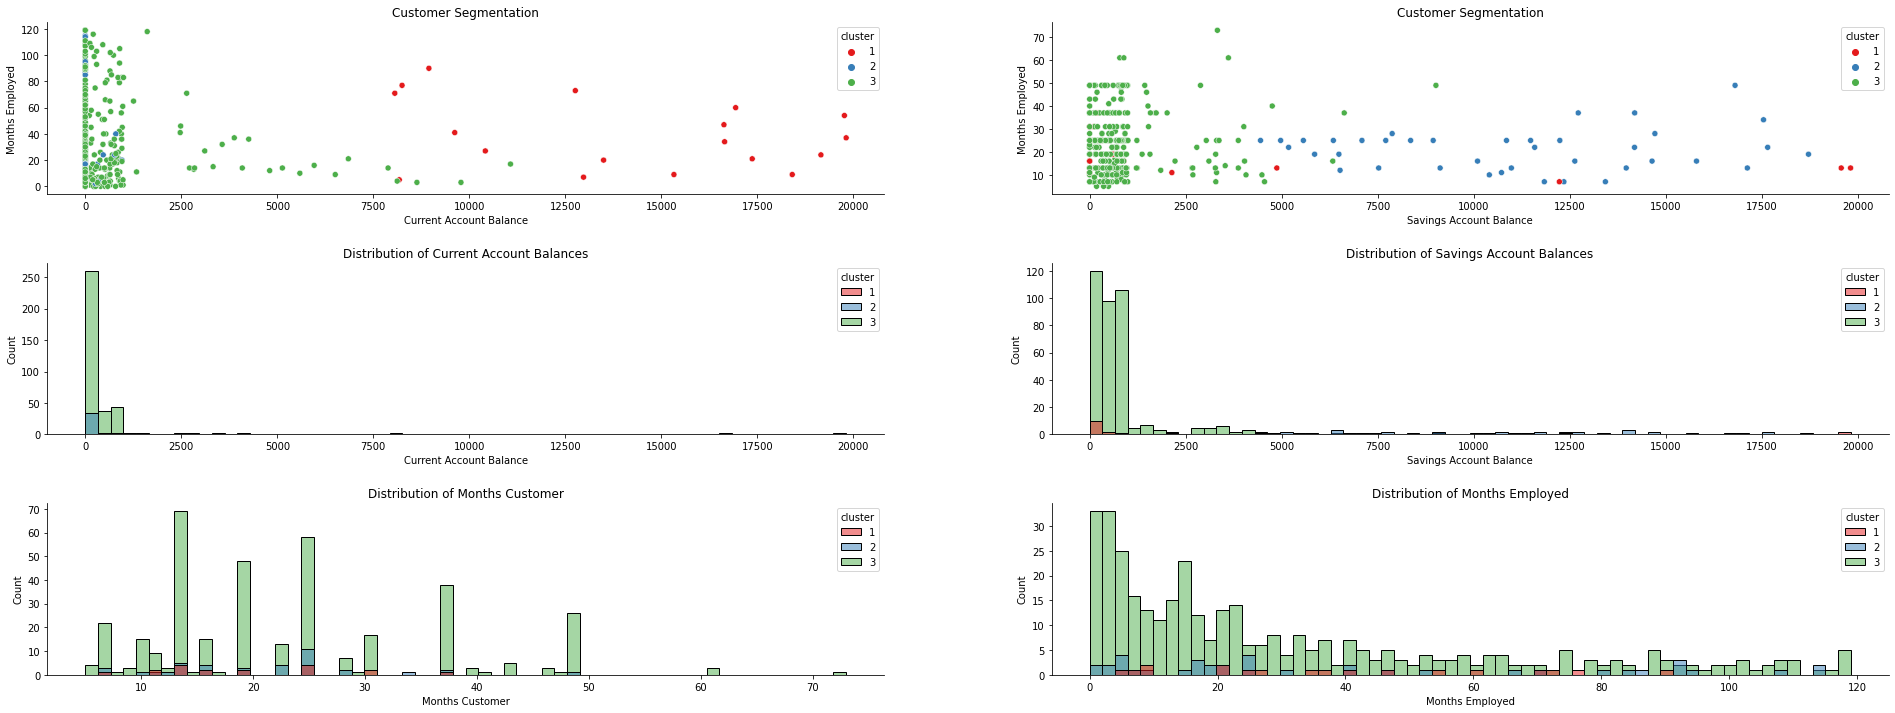

In [189]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(33, 12))

# Create a scatter plot for current account balances by Months Employed
sns.scatterplot(data=df, x='Current Account', y='Months Employed', hue='cluster', ax = axes[0,0], palette='Set1')
axes[0,0].set_xlabel('Current Account Balance')
axes[0,0].set_ylabel('Months Employed')
axes[0,0].set_title('Customer Segmentation')


axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Create a scatter plot for savings account balances by Months Customer
sns.scatterplot(data=df, x='Savings Account', y='Months Customer', hue='cluster', ax = axes[0,1], palette='Set1')
axes[0,1].set_xlabel('Savings Account Balance')
axes[0,1].set_ylabel('Months Employed')
axes[0,1].set_title('Customer Segmentation')


axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)


# Create a histogram of current account balances
sns.histplot(data=df, x='Current Account', bins=60, hue='cluster', ax=axes[1,0], palette = 'Set1')
axes[1,0].set_title('Distribution of Current Account Balances')
axes[1,0].set_xlabel('Current Account Balance')
axes[1,0].set_ylabel('Count')

axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)



# Create a histogram of Savings Account balances
sns.histplot(data=df, x='Savings Account', bins=60, hue='cluster', ax=axes[1,1], palette = 'Set1')
axes[1,1].set_title('Distribution of Savings Account Balances')
axes[1,1].set_xlabel('Savings Account Balance')
axes[1,1].set_ylabel('Count')

axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)



# Create a histogram of Months Customer
sns.histplot(data=df, x='Months Customer', bins=60, hue='cluster', ax=axes[2,0], palette = 'Set1')
axes[2,0].set_title('Distribution of Months Customer')
axes[2,0].set_xlabel('Months Customer')
axes[2,0].set_ylabel('Count')

axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)


# Create a histogram of Months Employed
sns.histplot(data=df, x='Months Employed', bins=60, hue='cluster', ax=axes[2,1], palette = 'Set1')
axes[2,1].set_title('Distribution of Months Employed')
axes[2,1].set_xlabel('Months Employed')
axes[2,1].set_ylabel('Count')

axes[2,1].spines['top'].set_visible(False)
axes[2,1].spines['right'].set_visible(False)



# Adjust the layout
plt.subplots_adjust(hspace=0.4)


plt.show()


### Wards Clustering

This model considers the square of the error between pairs of objects. <p>An object joins a cluster only if the square of the error between cluster members is minimized. 

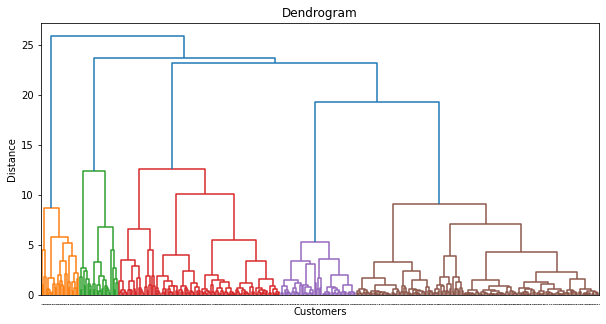

In [190]:
# define the variables to be used in clustering
X = df[['Current Account', 'Savings Account', 'Months Customer', 'Months Employed']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform complete-linkage clustering
Z = linkage(X_scaled, method='ward', metric='euclidean')


# Plot a dendrogram to help choose the number of clusters
plt.figure(figsize=(10, 5))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=180, leaf_font_size=2.)
plt.show()

In [191]:

# Cut the dendrogram to obtain the desired number of clusters
threshold = 15
clusters = fcluster(Z, t=threshold, criterion='distance')

# n_clusters = 5
# clusters = pd.Series(
#     pd.cut(
#         np.arange(X.shape[0]), 
#         n_clusters, 
#         labels=False
#     )
# )

# # Add the cluster labels to the original DataFrame
df['cluster'] = clusters
print('There are ' + str(len(df['cluster'].value_counts())) + ' clusters')

There are 5 clusters


In [192]:
#cluster 1
print('\nDescriptive statistics for Cluster 1\n')
df[df['cluster']== 1].describe(include='all').transpose().reset_index().rename(columns={'index': 'Column'})


Descriptive statistics for Cluster 1



,Column,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,Current Account,29.0,NaN,NaN,NaN,1451.172414,3517.338473,0.0,0.0,0.0,317.0,12974.0
1,Savings Account,29.0,NaN,NaN,NaN,13537.758621,3322.291815,6330.0,11481.0,12721.0,15800.0,19811.0
2,Months Customer,29.0,NaN,NaN,NaN,19.344828,10.34158,7.0,13.0,16.0,25.0,49.0
3,Months Employed,29.0,NaN,NaN,NaN,36.517241,32.809647,0.0,14.0,24.0,53.0,115.0
4,Gender,29,2,M,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Marital Status,29,3,Single,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Age,29.0,NaN,NaN,NaN,35.034483,12.178678,19.0,26.0,31.0,39.0,65.0
7,Housing,29,2,Own,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Job,29,4,Skilled,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Credit Risk,29,2,Low,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
#cluster 2
print('\nDescriptive statistics for Cluster 2\n')
df[df['cluster']== 2].describe(include='all').transpose().reset_index().rename(columns={'index': 'Column'})


Descriptive statistics for Cluster 2



,Column,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,Current Account,30.0,NaN,NaN,NaN,10222.133333,5775.787988,2827.0,5246.75,8792.0,16304.5,19812.0
1,Savings Account,30.0,NaN,NaN,NaN,465.666667,957.339249,0.0,0.0,130.0,639.25,4873.0
2,Months Customer,30.0,NaN,NaN,NaN,19.766667,10.529706,7.0,13.0,17.5,24.5,61.0
3,Months Employed,30.0,NaN,NaN,NaN,30.366667,24.026542,3.0,14.0,21.0,40.0,90.0
4,Gender,30,2,M,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Marital Status,30,3,Single,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Age,30.0,NaN,NaN,NaN,34.266667,12.022775,22.0,25.0,32.0,36.75,67.0
7,Housing,30,3,Own,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Job,30,4,Skilled,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Credit Risk,30,2,Low,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
#cluster 3
print('\nDescriptive statistics for Cluster 3\n')
df[df['cluster']== 3].describe(include='all').transpose().reset_index().rename(columns={'index': 'Column'})


Descriptive statistics for Cluster 3



,Column,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,Current Account,123.0,NaN,NaN,NaN,224.886179,412.338179,0.0,0.0,0.0,317.5,2641.0
1,Savings Account,123.0,NaN,NaN,NaN,973.056911,1712.53473,0.0,200.5,538.0,835.5,10099.0
2,Months Customer,123.0,NaN,NaN,NaN,21.910569,11.795392,5.0,13.0,19.0,25.0,61.0
3,Months Employed,123.0,NaN,NaN,NaN,70.325203,26.969168,22.0,47.5,67.0,91.5,119.0
4,Gender,123,2,M,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Marital Status,123,3,Single,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Age,123.0,NaN,NaN,NaN,38.95122,11.533169,20.0,30.0,38.0,46.0,73.0
7,Housing,123,3,Own,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Job,123,3,Skilled,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Credit Risk,123,2,Low,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
#cluster 4
print('\nDescriptive statistics for Cluster 4\n')
df[df['cluster']== 4].describe(include='all').transpose().reset_index().rename(columns={'index': 'Column'})


Descriptive statistics for Cluster 4



,Column,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,Current Account,58.0,NaN,NaN,NaN,623.137931,1225.059704,0.0,0.0,143.5,703.25,6509.0
1,Savings Account,58.0,NaN,NaN,NaN,575.637931,651.699228,0.0,107.0,495.0,784.75,3326.0
2,Months Customer,58.0,NaN,NaN,NaN,43.155172,7.273605,31.0,37.0,43.0,49.0,73.0
3,Months Employed,58.0,NaN,NaN,NaN,17.034483,13.88798,0.0,5.25,14.0,27.25,46.0
4,Gender,58,2,M,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Marital Status,58,3,Single,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Age,58.0,NaN,NaN,NaN,32.103448,9.445485,20.0,25.0,29.5,36.0,64.0
7,Housing,58,3,Own,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Job,58,4,Skilled,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Credit Risk,58,2,High,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
#cluster 5
print('\nDescriptive statistics for Cluster 5\n')
df[df['cluster']== 5].describe(include='all').transpose().reset_index().rename(columns={'index': 'Column'})


Descriptive statistics for Cluster 5



,Column,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,Current Account,185.0,NaN,NaN,NaN,177.594595,293.754894,0.0,0.0,0.0,303.0,986.0
1,Savings Account,185.0,NaN,NaN,NaN,1138.924324,1595.491169,0.0,343.0,595.0,922.0,8357.0
2,Months Customer,185.0,NaN,NaN,NaN,18.264865,7.016294,5.0,13.0,19.0,25.0,31.0
3,Months Employed,185.0,NaN,NaN,NaN,10.52973,9.037388,0.0,3.0,8.0,17.0,40.0
4,Gender,185,2,M,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Marital Status,185,3,Divorced,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Age,185.0,NaN,NaN,NaN,32.010811,9.930732,18.0,24.0,30.0,37.0,66.0
7,Housing,185,3,Own,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Job,185,4,Skilled,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Credit Risk,185,2,High,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p>The tables shows that: </p>
<ul>
<li>The data is more evenly spread than complete link clustering
<li>Current Account: 
<ul>
<li>Customers in Cluster 1 have between 0 and 12,974 as thier balance </li>
<li>Customers in Cluster 2 have between 2,827 and 19,812 as thier balance</li>
<li>Customers in Cluster 3 have between 0 and 2,641 as thier balance </li>
<li>Customers in Cluster 4 have between 0 and 6,509 as thier balance </li>
<li>Customers in Cluster 5 have between 0 and 986 as thier balance </li>
</ul>

<li>Savings Account: 
<ul>
<li>Customers in Cluster 1 have between 6330 and 19,811 as thier balance</li>
<li>Customers in Cluster 2 have between 0 and 4,673 as thier balance</li>
<li>Customers in Cluster 3 have between 0 and 16,099 as thier balance </li>
<li>Customers in Cluster 4 have between 0 and 3,326 as thier balance </li>
<li>Customers in Cluster 5 have between 0 and 8,357 as thier balance </li>

</ul>

<li>Customer Tenure: 
<ul>
<li>Customers in Cluster 1 have customers for 7 till 49 months </li>
<li>Customers in Cluster 2 have customers for 7 till 61 months </li>
<li>Customers in Cluster 3 have customers for 5 till 61 months </li>
<li>Customers in Cluster 4 have customers for 31 till 73 months </li>
<li>Customers in Cluster 5 have customers for 5 till 31 months </li>
</ul>

<li>Employment Tenure: 
<ul>
<li>Customers in Cluster 1 have been employed for 0 till 115 months </li>
<li>Customers in Cluster 2 have been employed for 3 till 90 months </li>
<li>Customers in Cluster 3 have been employed for 22 till 119 months </li>
<li>Customers in Cluster 4 have been employed for 0 till 46 months </li>
<li>Customers in Cluster 5 have been employed for 0 till 40 months </li>
</ul>

<li>Age: 
<ul>
<li>Customers in Cluster 1 are aged between 19 and 65 years </li>
<li>Customers in Cluster 2 are aged between 22 and 67 years </li>
<li>Customers in Cluster 3 are aged between 22 and 73 years </li>
<li>Customers in Cluster 4 are aged between 20 and 64 years </li>
<li>Customers in Cluster 5 are aged between 18 and 66 years </li>
</ul>

 



<li> Customers in cluster 2 have low current account balance and high savings account balance.  

<li>All the customers in cluster 4 have been customers for more than 2 years and have been employed for less than 4 years and are older than 20 Years. 
<li>All the customers in cluster 3 have been employed for more than a year, and have less than 2641 as their current account balance. 
<li>All customers in cluster 1 are younger than 65 and have more than 6,330 as their savings account balance but less than 12,974 in their savings account. 

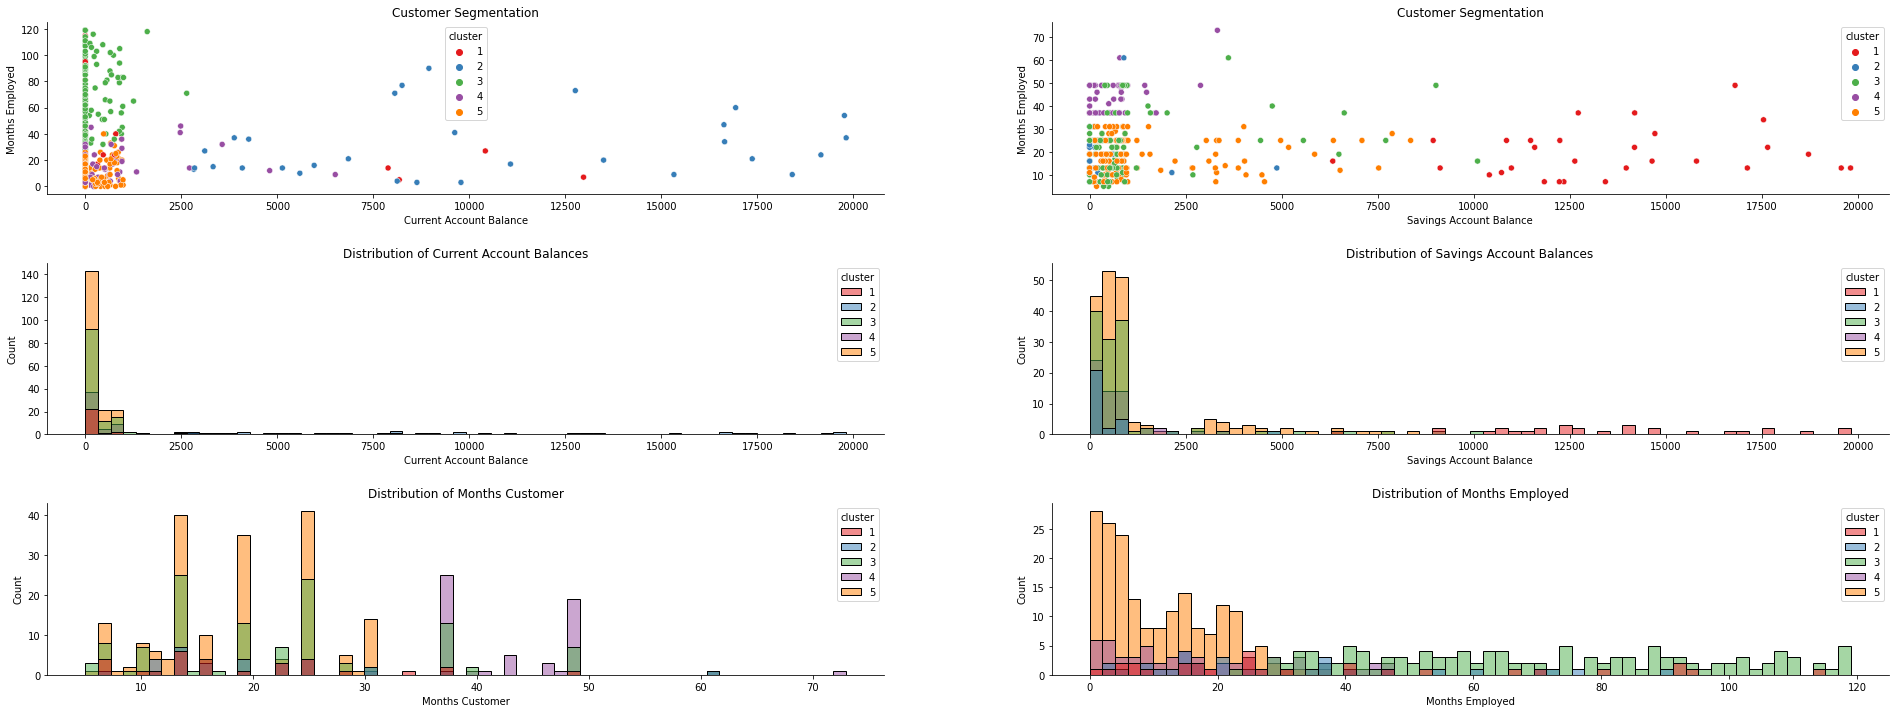

In [198]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(33, 12))

# Create a scatter plot for current account balances by Months Employed
sns.scatterplot(data=df, x='Current Account', y='Months Employed', hue='cluster', ax = axes[0,0], palette='Set1')
axes[0,0].set_xlabel('Current Account Balance')
axes[0,0].set_ylabel('Months Employed')
axes[0,0].set_title('Customer Segmentation')


axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Create a scatter plot for savings account balances by Months Customer
sns.scatterplot(data=df, x='Savings Account', y='Months Customer', hue='cluster', ax = axes[0,1], palette='Set1')
axes[0,1].set_xlabel('Savings Account Balance')
axes[0,1].set_ylabel('Months Employed')
axes[0,1].set_title('Customer Segmentation')


axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)


# Create a histogram of current account balances
sns.histplot(data=df, x='Current Account', bins=60, hue='cluster', ax=axes[1,0], palette = 'Set1')
axes[1,0].set_title('Distribution of Current Account Balances')
axes[1,0].set_xlabel('Current Account Balance')
axes[1,0].set_ylabel('Count')

axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)



# Create a histogram of Savings Account balances
sns.histplot(data=df, x='Savings Account', bins=60, hue='cluster', ax=axes[1,1], palette = 'Set1')
axes[1,1].set_title('Distribution of Savings Account Balances')
axes[1,1].set_xlabel('Savings Account Balance')
axes[1,1].set_ylabel('Count')

axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)



# Create a histogram of Months Customer
sns.histplot(data=df, x='Months Customer', bins=60, hue='cluster', ax=axes[2,0], palette = 'Set1')
axes[2,0].set_title('Distribution of Months Customer')
axes[2,0].set_xlabel('Months Customer')
axes[2,0].set_ylabel('Count')

axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)


# Create a histogram of Months Employed
sns.histplot(data=df, x='Months Employed', bins=60, hue='cluster', ax=axes[2,1], palette = 'Set1')
axes[2,1].set_title('Distribution of Months Employed')
axes[2,1].set_xlabel('Months Employed')
axes[2,1].set_ylabel('Count')

axes[2,1].spines['top'].set_visible(False)
axes[2,1].spines['right'].set_visible(False)



# Adjust the layout
plt.subplots_adjust(hspace=0.4)


plt.show()


## In this report, agglomerative hierarchical clustering methods were used to segment the customer data of a bank. 
The data was segmented using both the complete link and ward clustering methods. The segmented data was analysed and the difference between the characteristic of each cluster were shown.  
From the result of our analysis, it is recommended that the ward clustering method is used for customer segmentation, as the data was more evenly spread, and the clusters were more distinct than the clusters gotten from the complete link clustering method. 